In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('LifeExpectancyData.csv')

In [4]:
df.head()

,Year,lifeexpectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,65.0,263,62,0.01,71.279624,65,1154,19.1,83,6,8.16,65,0.1,33736494.0,17.2,17.3,0.479,10.1
1,2014,59.9,271,64,0.01,73.523582,62,492,18.6,86,58,8.18,62,0.1,327582.0,17.5,17.5,0.476,10.0
2,2013,59.9,268,66,0.01,73.219243,64,430,18.1,89,62,8.13,64,0.1,31731688.0,17.7,17.7,0.470,9.9
3,2012,59.5,272,69,0.01,78.184215,67,2787,17.6,93,67,8.52,67,0.1,3696958.0,17.9,18.0,0.463,9.8
4,2011,59.2,275,71,0.01,7.097109,68,3013,17.2,97,68,7.87,68,0.1,2978599.0,18.2,18.2,0.454,9.5


In [5]:
y = df['lifeexpectancy']
x = df.loc[:, df.columns != 'lifeexpectancy']

In [6]:
x.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,263,62,0.01,71.279624,65,1154,19.1,83,6,8.16,65,0.1,33736494.0,17.2,17.3,0.479,10.1
1,2014,271,64,0.01,73.523582,62,492,18.6,86,58,8.18,62,0.1,327582.0,17.5,17.5,0.476,10.0
2,2013,268,66,0.01,73.219243,64,430,18.1,89,62,8.13,64,0.1,31731688.0,17.7,17.7,0.470,9.9
3,2012,272,69,0.01,78.184215,67,2787,17.6,93,67,8.52,67,0.1,3696958.0,17.9,18.0,0.463,9.8
4,2011,275,71,0.01,7.097109,68,3013,17.2,97,68,7.87,68,0.1,2978599.0,18.2,18.2,0.454,9.5


In [7]:
y.head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: lifeexpectancy, dtype: float64

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [9]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [10]:
lifeexpectancy_pred = model.predict(x_test)

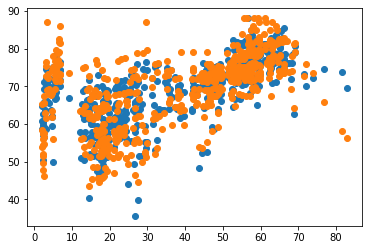

In [19]:
plt.scatter(x_test.iloc[:,7], lifeexpectancy_pred);
plt.scatter(x_test.iloc[:,7], y_test)

In [12]:
x_test.iloc[:,0]

2448    2008
852     2013
1168    2001
40      2007
1682    2000
        ... 
157     2002
944     2001
82      2013
1292    2005
1803    2008
Name: Year, Length: 588, dtype: int64

In [13]:
print('Coefficients: \n', model.coef_)

print('Intercept: \n', model.intercept_)

# The mean squared error

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, lifeexpectancy_pred))

# The coefficient of determination: 1 is perfect prediction

print('Coefficient of determination: %.2f'
      % r2_score(y_test, lifeexpectancy_pred))

Coefficients: 
 [ 4.38679274e-03 -2.05638688e-02  9.82515312e-02  1.79717576e-01
  4.38531337e-04 -1.71319458e-03 -1.96078418e-05  5.05108579e-02
 -7.35665547e-02  3.15323931e-02  4.71545914e-02  3.59762682e-02
 -4.68636302e-01  1.29344263e-09 -1.10051356e-01 -7.45272781e-03
  1.24715432e+01  2.95883827e-03]
Intercept: 
 48.681345250494005
Mean squared error: 17.94
Coefficient of determination: 0.80


In [ ]:
#y(lifeexpectancy)=4.38679274e-3(Year)
-2.05638688e-02(Adult Mortality)+9.82515312e-02(infant deaths)
+1.79717576e-01(Alcohol)+4.38531337e(percentage expenditure)
-1.71319458e-04(Hepatitis B)-1.96078418e-05(Measles)
+5.05108579e-02(BMI)-7.35665547e-02(under-five deaths)
+3.15323931e-02(Polio)+4.71545914e-02(Total expenditure)+3.59762682e-02(Diphtheria)
-4.68636302e-01(HIV/AIDS)+1.29344263e-09(Population)-1.10051356e-01(thinness 1-19 year)
-7.45272781e-03(thinness 5-9 years)+1.24715432e+01(Income composition of resources)+2.95883827e-03(Schooling)+48.6